In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve, roc_curve, auc

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df = pd.DataFrame(data)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Class', ylabel='count'>

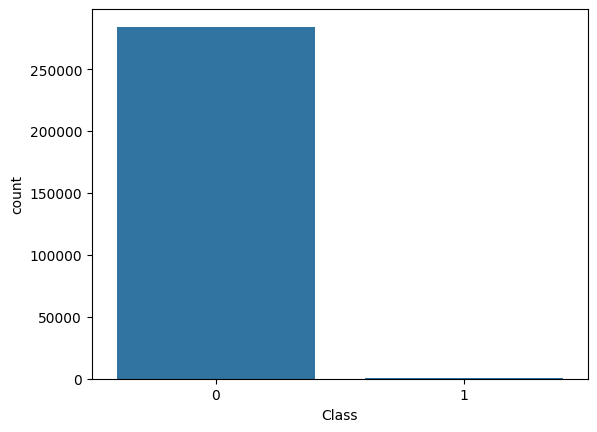

In [7]:
sb.countplot(df,x='Class')


##### We can see that the class 1 which is of fraud is extremely less as compared to the class 0

In [8]:
df[['Time','Amount','Class']]

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [49]:
fraud = df[df['Class']==1]
non_fraud = df[df['Class']==0]
fraud['Hour'] = (fraud['Time']//3600)%24
df['Hour_of_Day'] = (df['Time'] / 3600).astype(int) % 24

C:\Users\KAPISH\AppData\Local\Temp\ipykernel_18292\2264184049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Hour'] = (fraud['Time']//3600)%24


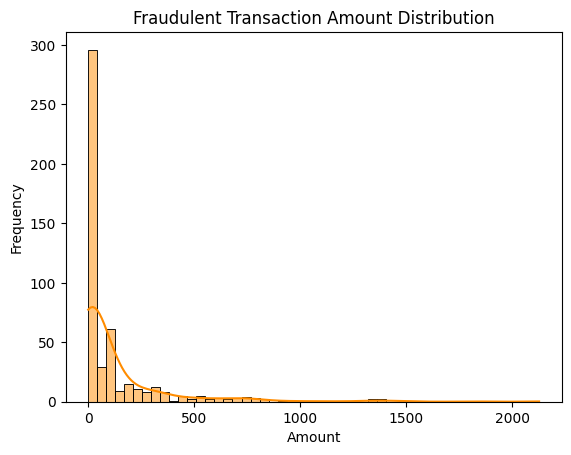

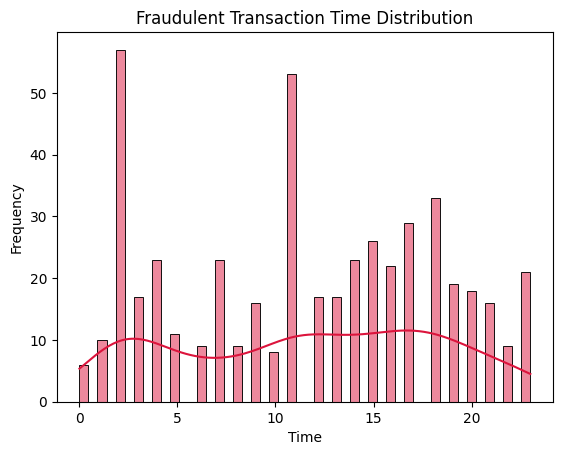

In [50]:
import seaborn as sns

# Histogram for Amount
sns.histplot(fraud['Amount'], bins=50, kde=True, color='darkorange')
plt.title('Fraudulent Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram for Time
sns.histplot(fraud['Hour'], bins=50, kde=True, color='crimson')
plt.title('Fraudulent Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


##### One peak appears around 0-2 hours (likely very early morning, or late night on the previous day). The bar at hour 2 is particularly high. Another significant peak is observed around 10-12 hours (late morning/midday). The bar at hour 11 is also very high.

##### Lower Fraud in Mid-Morning/Early Afternoon: There seems to be a dip in fraudulent activity around hours 5-8, indicating relatively fewer fraudulent transactions during that period compared to the peaks. Similarly, there's another dip after the second peak, around hours 22-23.


### Feature Engineering based on 'Hour-of-Day" (One-Hot Encoding)
##### Treating 'Hour_of_Day' as a categorical variable can be effective, especially if you expect non-linear relationships.

In [51]:
df_encoded = pd.get_dummies(df, columns=['Hour_of_Day'], prefix='Hour',dtype='int')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 55 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

## DATA SPLITING, FEATURE SCALING AND MODEL TRAINING

In [52]:
try:
    df = pd.read_csv('creditcard.csv')
    df['Hour_of_Day'] = (df['Time'] / 3600).astype(int) % 24
    df_encoded = pd.get_dummies(df, columns=['Hour_of_Day'], prefix='Hour', dtype=int)
except:
    print("Creditcard.csv not found. Creating a mock DataFrame for demonstration.")
    num_samples = 100000
    num_fraud = int(num_samples * 0.0017)
    mock_class = np.zeros(num_samples, dtype=int)
    fraud_indices = np.random.choice(num_samples, num_fraud, replace=False)
    mock_class[fraud_indices] = 1
    mock_time = np.random.randint(0, 172800, num_samples)
    mock_amount = np.random.rand(num_samples) * 2000
    mock_v_features = np.random.rand(num_samples, 28) * 10 - 5 # PCA features
    
    df_data = {
        'Time': mock_time,
        'Amount': mock_amount,
        'Class': mock_class
    }
    for i in range(1, 29):
        df_data[f'V{i}'] = mock_v_features[:, i-1]
    
    df_encoded = pd.DataFrame(df_data)
    df_encoded['Hour_of_Day'] = (df_encoded['Time'] / 3600).astype(int) % 24
    df_encoded = pd.get_dummies(df_encoded, columns=['Hour_of_Day'], prefix='Hour', dtype=int)


In [53]:
X = df_encoded.drop('Class',axis =1)
y = df_encoded ['Class']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify = y)
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [55]:
#Normalizing the amount column
scaler = StandardScaler()
X_train['Amount'] =  scaler.fit_transform(X_train[['Amount']])
X_test['Amount'] = scaler.transform(X_test[['Amount']])

In [99]:
import joblib
import os
numerical_cols_to_scale = ['Amount']
scaler = StandardScaler()
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])
model_dir = 'trained_models'
if not os.path.exists(model_dir): # Ensure the directory exists
    os.makedirs(model_dir)

joblib.dump(scaler, os.path.join(model_dir, 'scaler_amount.joblib'))
print(f"Scaler saved to {os.path.join(model_dir, 'scaler_amount.joblib')}")

Scaler saved to trained_models\scaler_amount.joblib


In [101]:
import numpy as np
import os

# Define the directory where you want to save all your model-related files
model_dir = 'trained_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# THIS IS THE MOST CRITICAL LINE FOR THE 'FEATURE_NAMES MISMATCH' ERROR
# Save the exact column names and their order from your final training data
np.save(os.path.join(model_dir, 'trained_feature_columns.npy'), X_train_res.columns)
print(f"Saved trained feature columns to: {os.path.join(model_dir, 'trained_feature_columns.npy')}")

# OPTIONAL: Print to verify the order
print("\nOrder of features saved:")
print(X_train_res.columns.tolist())

Saved trained feature columns to: trained_models\trained_feature_columns.npy

Order of features saved:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23']


In [56]:
## Addressing class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print(f"Original training shapes: X={X_train.shape}, y={y_train.shape}")
print(f"Resampled training shapes: X_res={X_train_res.shape}, y_res={y_train_res.shape}")

Original training shapes: X=(227845, 54), y=(227845,)
Resampled training shapes: X_res=(454902, 54), y_res=(454902,)


## Logistic Regression Model

In [57]:
model =LogisticRegression(solver = 'liblinear', random_state = 42, class_weight = 'balanced')

In [58]:
print("\nTraining Logistic Regression model...")
model.fit(X_train_res, y_train_res)
print("Model training complete.")


Training Logistic Regression model...
Model training complete.


In [59]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba

array([0.03255098, 0.28514168, 0.17673236, ..., 0.01305168, 0.02303467,
       0.29093171])

In [61]:
print("\n--- Logistic Regression Model Evaluation on Test Set ---")
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f'\n')
print(classification_report(y_test, y_pred))


--- Logistic Regression Model Evaluation on Test Set ---

Confusion Matrix:
[[56071   793]
 [   10    88]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.10      0.90      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.94      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [62]:
roc_auc = roc_auc_score(y_test,y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9678


In [63]:
avg_precision = average_precision_score(y_test, y_pred_proba)
print(f"Average Precision Score: {avg_precision:.4f}")

Average Precision Score: 0.7175


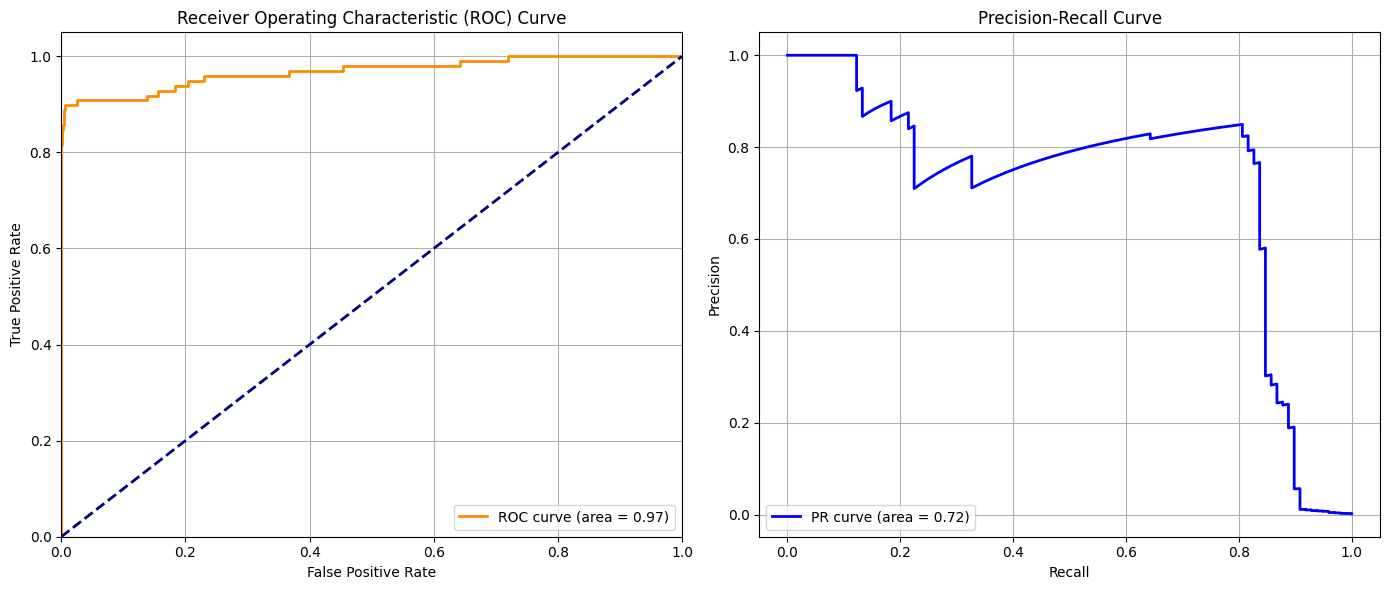

In [64]:
plt.figure(figsize=(14, 6))
# ROC Curve
plt.subplot(1, 2, 1)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall Curve
plt.subplot(1, 2, 2)
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (area = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

#### As we can see that the our logistic tregression model si performing significantly well having 90% Recall with 10% precision. The Logistic Regression model was an invaluable first step. 
#### It proved that your data preparation pipeline is robust and that significant signals for fraud detection exist in your features. It provided a strong performance benchmark (especially in recall and a greatly reduced FP count) against which more complex models can now be rigorously compared. 
#### Its limitations, particularly in precision, now clearly justify the decision to explore more powerful, non-linear ensemble models like Random Forest or XGBoost, with the expectation that they can achieve an even better balance of high recall and substantially higher precision.

## XGBoost Model

In [69]:
import xgboost as xgb
from xgboost import XGBClassifier

In [89]:
print("\n--- Training XGBoost Classifier ---")
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_estimators=200,     
    learning_rate=0.1,     
    n_jobs=-1              
)
xgb_model.fit(X_train_res, y_train_res)
print("XGBoost model training complete.")


--- Training XGBoost Classifier ---
XGBoost model training complete.


In [90]:
y_pred_xgb = xgb_model.predict(X_test)

In [91]:
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [92]:
print("----Confusion matrix for XGBoost model------")
cm1 = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(cm1)
print(f'\n')
print(classification_report(y_test, y_pred_xgb))

----Confusion matrix for XGBoost model------

Confusion Matrix:
[[56830    34]
 [   14    84]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.86      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [93]:
roc_auc_xgb = roc_auc_score(y_test,y_pred_proba_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

ROC AUC Score: 0.9829


In [94]:
avg_precision_xgb = average_precision_score(y_test, y_pred_proba_xgb)
print(f"Average Precision Score: {avg_precision_xgb:.4f}")

Average Precision Score: 0.8683


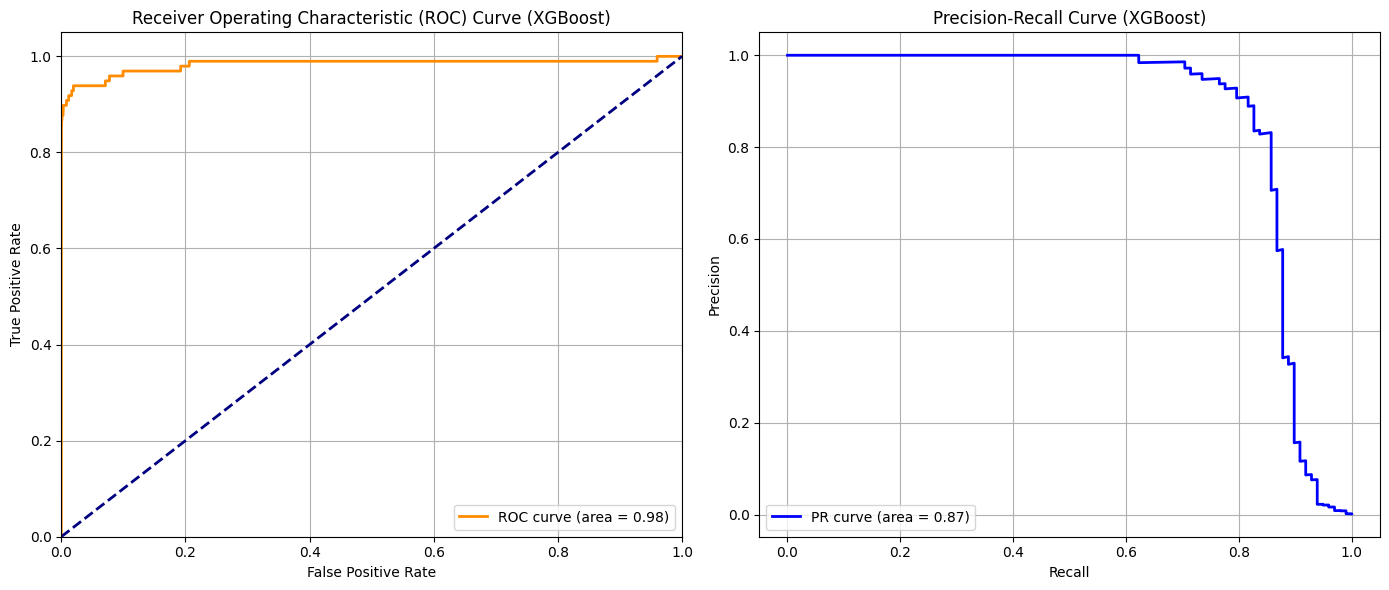

In [95]:
# --- Optional: Visualize ROC Curve and Precision-Recall Curve ---
plt.figure(figsize=(14, 6))

# ROC Curve
plt.subplot(1, 2, 1)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_xgb)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (XGBoost)')
plt.legend(loc="lower right")
plt.grid(True)

# Precision-Recall Curve
plt.subplot(1, 2, 2)
precision_xgb, recall_xgb, thresholds_pr_xgb = precision_recall_curve(y_test, y_pred_proba_xgb)
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2, label=f'PR curve (area = {avg_precision_xgb:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (XGBoost)')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

In [97]:
# Define the directory where you want to save models
import os
model_dir = 'trained_models'
if not os.path.exists(model_dir):
    os.makedirs(model_dir) # Creates the directory if it doesn't exist

# Save the XGBoost model
# You can choose a .json or .ubj extension. JSON is human-readable.
model_path = os.path.join(model_dir, 'xgboost_fraud_detection_model.json')
xgb_model.save_model(model_path)
print(f"\nXGBoost model saved successfully to: {model_path}")

# --- You might also add a note about loading it later ---
# To load it back:
# loaded_xgb_model = xgb.XGBClassifier()
# loaded_xgb_model.load_model(model_path)
# print("Model loaded for verification.")


XGBoost model saved successfully to: trained_models\xgboost_fraud_detection_model.json
